In [1]:
import pandas as pd

In [2]:
microdados = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep=";", encoding='ISO-8859-1')

In [3]:
#Listando os valores de colunas
microdados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
#Aqui, tenho somente as colunas que quero trabalhar na análise
colunasselecionadas = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'NO_MUNICIPIO_PROVA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO','Q024', 'Q025']

In [5]:
#REQUISITO 1: Usando o filter
microdadosEnem = microdados.filter(items=colunasselecionadas)

In [6]:
microdadosEnem.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
0,210057943671,14,M,2,1,0,NaN,NaN,Brasília,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A
1,210057516120,14,M,1,1,0,NaN,NaN,Brasília,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B
2,210057280536,5,F,2,1,0,NaN,NaN,Presidente Tancredo Neves,1.0,140.0,200.0,120.0,140.0,160.0,760.0,A,B
3,210055724397,6,M,3,1,0,NaN,NaN,Cariacica,1.0,120.0,40.0,40.0,100.0,20.0,320.0,B,B
4,210055097896,4,M,3,1,0,NaN,NaN,Salinópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A


PERGUNTA 1: Qual a lista de todos os inscritos por Estado da Federação?

In [7]:
col_UF = microdadosEnem['SG_UF_ESC'] 
col_UF.value_counts()

SG_UF_ESC
SP    184295
CE    102972
MG     68869
RJ     68435
PR     50307
GO     47563
BA     44483
PE     43562
RS     41842
PA     34897
SC     31316
AM     27737
MA     27679
PB     21483
ES     19998
DF     19348
MT     16877
RN     16701
PI     16296
AL     15685
MS     13105
SE     10802
RO      9687
TO      7626
AC      4291
AP      3869
RR      2219
Name: count, dtype: int64

PERGUNTA 1.1: Quais são os 3 Estados da Federação com maior número de inscritos do ENEM?

In [8]:
col_UF.value_counts()
col_UF.value_counts().head(3)

SG_UF_ESC
SP    184295
CE    102972
MG     68869
Name: count, dtype: int64

Criando um gráfico para visualização do número de inscritos

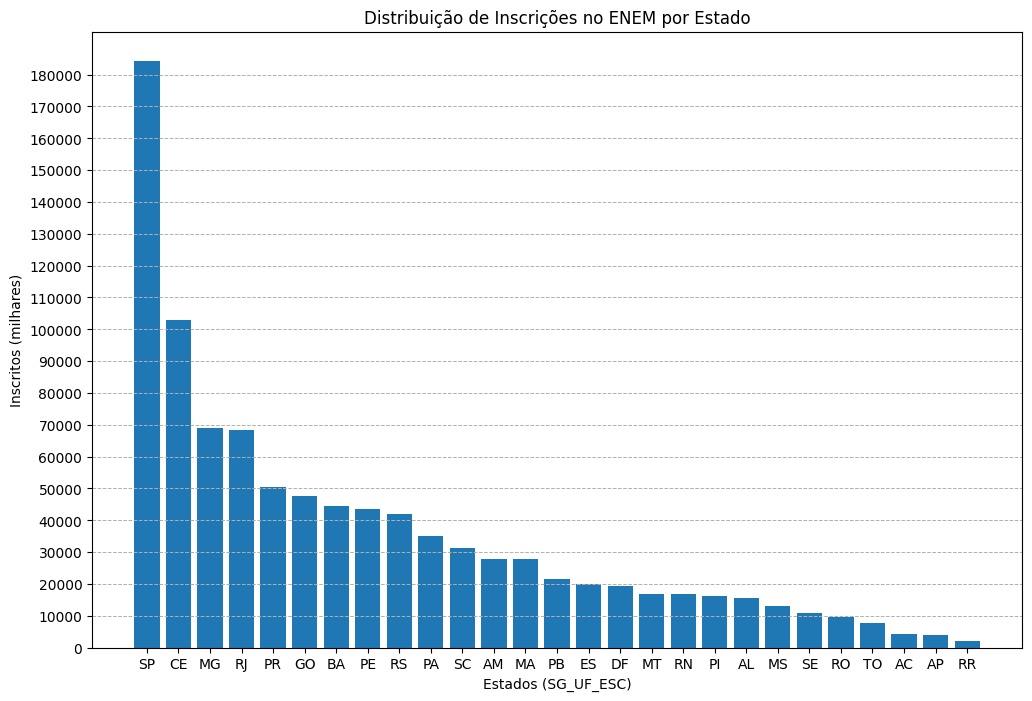

In [9]:
#REQUISITO 2: Criando o Gráfico
import matplotlib.pyplot as plt
import numpy as np

# Criando um DataFrame para organizar as informações de "col_UF.value_counts()"
data_UF = {'SG_UF_ESC': ['SP', 'CE', 'MG', 'RJ', 'PR', 'GO', 'BA', 'PE', 'RS', 'PA', 'SC', 'AM', 'MA', 'PB', 'ES', 'DF', 'MT', 'RN', 'PI', 'AL', 'MS', 'SE', 'RO', 'TO', 'AC', 'AP', 'RR'],
        'Inscritos': [184295, 102972, 68869, 68435, 50307, 47563, 44483, 43562, 41842, 34897, 31316, 27737, 27679, 21483, 19998, 19348, 16877, 16701, 16296, 15685, 13105, 10802, 9687, 7626, 4291, 3869, 2219]}

df_UF = pd.DataFrame(data_UF)

# Classificando pelo número de inscritos
df_UF = df_UF.sort_values(by='Inscritos', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(df_UF['SG_UF_ESC'], df_UF['Inscritos'])
plt.xlabel('Estados (SG_UF_ESC)')
plt.ylabel('Inscritos (milhares)')
plt.title('Distribuição de Inscrições no ENEM por Estado')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
yt = np.arange(0, 185000, 10000)
plt.yticks(yt)

plt.show()


PERGUNTA 2: Quais os municipios com mais inscritos no ENEM?

In [10]:
col_MUNICIPIO = microdadosEnem['NO_MUNICIPIO_PROVA']
col_MUNICIPIO.value_counts().head()

NO_MUNICIPIO_PROVA
São Paulo         147046
Rio de Janeiro    105397
Fortaleza          71714
Brasília           65401
Belém              59976
Name: count, dtype: int64

PERGUNTA 3: Quais os municipios com mais inscritos no ENEM dentro do Estado de São Paulo?

In [11]:
# Filtrando para incluir apenas os inscritos de São Paulo (SP)
inscritos_sp = microdadosEnem[microdadosEnem['SG_UF_ESC'] == 'SP']
col_MUNICIPIO = inscritos_sp.where(microdadosEnem['SG_UF_ESC'] == 'SP')

ranking_cidades_sp = inscritos_sp['NO_MUNICIPIO_PROVA'].value_counts().head(5)
ranking_cidades_sp

NO_MUNICIPIO_PROVA
São Paulo                46199
Guarulhos                 5786
Campinas                  5189
São Bernardo do Campo     4141
Santo André               3741
Name: count, dtype: int64

PERGUNTA 4: Se essas são as cidades com maior número de inscritos, qual a porcentagem que elas representam em relação ao resto do Estado?

In [12]:
#Requisito 3: Operações aritméticas
#Somando o ranking de municipios
soma_ranking_sp = ranking_cidades_sp.sum()
soma_ranking_sp

65056

In [13]:
#Somando as outras cidades 
cidades = inscritos_sp['NO_MUNICIPIO_PROVA'].value_counts()
outras_cidades = cidades.drop(['São Paulo', 'Guarulhos', 'Campinas', 'São Bernardo do Campo', 'Santo André'], axis=0)
soma_outras_cidades = outras_cidades.sum()
soma_outras_cidades

119239

A porcentagem representada pelo ranking das cinco cidades mais populosas é de: 35%

In [14]:
num = (soma_outras_cidades + soma_ranking_sp)
percent_ranking_sp = (soma_ranking_sp / num) * 100 
percent_ranking_sp = percent_ranking_sp.astype(int)
percent_ranking_sp 

35

PERGUNTA 5: Qual a porcentagem de Treineiros no ENEM?

In [15]:
#Quais os valores?
col_treineiro = microdadosEnem['IN_TREINEIRO']
col_treineiro.value_counts()

IN_TREINEIRO
0    2963373
1     512732
Name: count, dtype: int64

Segundo nosso dicionário da base de dados:
IN_TREINEIRO > Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
1	Sim
0	Não

In [16]:
#Devido ao tempo de processamento, criei a variavel "dist_treineiro" para manipulação da porcentagem
dist_treineiro = col_treineiro.value_counts()
dist_treineiro

IN_TREINEIRO
0    2963373
1     512732
Name: count, dtype: int64

In [17]:
#REQUISITO 4: Usando estatística
percent_treineiro = [100*x/dist_treineiro.sum() for x in dist_treineiro]
percent_treineiro

[85.24981264950281, 14.75018735049718]

In [18]:
#Selecionando apenas os treineiros
list_treineiro = [85.24981264950281, 14.75018735049718]
percent_sotreineiro = list_treineiro[1]
print = (f'A porcentagem de treineiros em 2022 foi de {percent_sotreineiro:.2f}%.')
print

'A porcentagem de treineiros em 2022 foi de 14.75%.'

PERGUNTA 6: Quem tem melhor nota de redação no ENEM? Alunos de escolas públicas ou particulares?

In [19]:
#Selecionando as colunas referentes a Tipo de Escola e Nota de Redação
col_selecionadas = ['TP_ESCOLA','NU_NOTA_REDACAO']
microdados_escola_notas = microdadosEnem.filter(items=col_selecionadas)
microdados_escola_notas

,TP_ESCOLA,NU_NOTA_REDACAO
0,1,NaN
1,1,NaN
2,1,760.0
3,1,320.0
4,1,NaN
...,...,...
3476100,2,NaN
3476101,2,NaN
3476102,2,660.0
3476103,3,NaN


In [69]:
#Requisito 5: Dropna
#Retirando os inscritos que não tiveram Nota de Redação contabilizada
microdados_escola_notas = microdados_escola_notas.dropna()
microdados_escola_notas

,TP_ESCOLA,NU_NOTA_REDACAO
2,1,760.0
3,1,320.0
7,1,440.0
9,1,360.0
11,3,940.0
...,...,...
3476095,1,580.0
3476097,1,740.0
3476098,2,580.0
3476099,1,520.0


In [77]:
#Entendendo a tabela: Pelo nosso dicionário, sabemos que "1" = Não informado; "2" = Escola Pública, "3" = Escola Particular
#Requisito 6: Usar rename
tipo_escola = {1: 'Não Informado', 2: 'Pública', 3: 'Privada'}

RESPOSTA 6: Pela média, podemos auferir que alunos de Escolas Particulares tiram, em média, 180 pontos a mais que alunos de escolas públicas

In [78]:
escola_notas = microdados_escola_notas.groupby('TP_ESCOLA').mean()
escola_notas.rename(index=tipo_escola, inplace=True)
escola_notas

,NU_NOTA_REDACAO
TP_ESCOLA,
Não Informado,623.365812
Privada,751.272068
Pública,576.635138


In [101]:
#Requisito 7: Exportando um dataframe. Nesse caso, a tabela atualizada da relação NOTA REDAÇÃO X TIPO DE ESCOLA.
tipo_escola = {1: 'Nao Informado', 2: 'Publica', 3: 'Privada'}

#Renomeando as linhas
microdados_escola_notas['TP_ESCOLA'] = microdados_escola_notas['TP_ESCOLA'].rename(tipo_escola)
microdados_escola_notas

,TP_ESCOLA,NU_NOTA_REDACAO
Pública,Não Informado,760.0
Privada,Não Informado,320.0
7,Não Informado,440.0
9,Não Informado,360.0
11,Privada,940.0
...,...,...
3476095,Não Informado,580.0
3476097,Não Informado,740.0
3476098,Pública,580.0
3476099,Não Informado,520.0


In [102]:
microdados_escola_notas.to_csv("Relação Escola_vs_Notas.csv")

PERGUNTA 7: Por último, analisei o impacto do acesso à computadores pessoais podem ter em notas de redação.

In [103]:
col_selecionadas = ['NU_INSCRICAO','NU_NOTA_REDACAO','Q024', 'Q025']
microdadosEnem_7 = microdadosEnem.filter(items=col_selecionadas)
microdadosEnem_7.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q024,Q025
0,210057943671,NaN,A,A
1,210057516120,NaN,E,B
2,210057280536,760.0,A,B
3,210055724397,320.0,B,B
4,210055097896,NaN,A,A


In [104]:
#Requisito 8: Usando fillna
#Tendo em vista que as notas podem ser 0(zero), atribui a nota -1 para aqueles que não entregaram redação.
microdadosEnem_7['NU_NOTA_REDACAO'].fillna('0', inplace=True)
microdadosEnem_7

C:\Users\azmavila\AppData\Local\Temp\ipykernel_26368\1108450106.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  microdadosEnem_7['NU_NOTA_REDACAO'].fillna('0', inplace=True)


,NU_INSCRICAO,NU_NOTA_REDACAO,Q024,Q025
0,210057943671,0,A,A
1,210057516120,0,E,B
2,210057280536,760.0,A,B
3,210055724397,320.0,B,B
4,210055097896,0,A,A
...,...,...,...,...
3476100,210056389903,0,A,B
3476101,210057205644,0,B,B
3476102,210056699189,660.0,B,B
3476103,210056983033,0,B,B


In [105]:
#Renomeando as linhas
dicionario_internet = {'A': 'Não.', 'B': 'Sim.'}
dicionario_computador = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}

#Requisito 9: Criando novas colunas
microdadosEnem_7['TEM_INTERNET'] = [dicionario_internet[resp] for resp in microdadosEnem.Q025]
microdadosEnem_7['TEM_COMPUTADOR'] = [dicionario_computador[resp] for resp in microdadosEnem.Q024]

In [106]:
microdadosEnem_7.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q024,Q025,TEM_INTERNET,TEM_COMPUTADOR
0,210057943671,0,A,A,Não.,Não.
1,210057516120,0,E,B,Sim.,"Sim, quatro ou mais."
2,210057280536,760.0,A,B,Sim.,Não.
3,210055724397,320.0,B,B,Sim.,"Sim, um."
4,210055097896,0,A,A,Não.,Não.


PERGUNTA 7.2: Quantos alunos têm computador e internet em casa?

In [107]:
microdadosEnem_7.filter(items=['NU_INSCRICAO', 'TEM_COMPUTADOR']).groupby('TEM_COMPUTADOR').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
TEM_COMPUTADOR,
Não.,1606940
"Sim, um.",1329603
"Sim, dois.",346479
"Sim, três.",129391
"Sim, quatro ou mais.",63692


In [108]:
microdadosEnem_7.filter(items=['NU_INSCRICAO', 'TEM_INTERNET']).groupby('TEM_INTERNET').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
TEM_INTERNET,
Sim.,3149732
Não.,326373


Agora, sobre o impacto: Não é real, dentro dos métodos que consegui utilizar, média entre as notas de redação, visto que realizo as duas médias em separado, quando, na verdade, são questões respondidas em conjunto pelo candidato. Apesar disso, fica obvia a crescente em proporção ao acesso à internet e computadores, conforme segue.

In [110]:
# Convertendo 'NU_NOTA_REDACAO' para numérico
microdadosEnem_7['NU_NOTA_REDACAO'] = pd.to_numeric(microdadosEnem_7['NU_NOTA_REDACAO'])

#Selecionando os dados e agrupando para calcular a média
selecionadas = microdadosEnem_7[['NU_NOTA_REDACAO', 'TEM_COMPUTADOR']] 
resultado_computador = selecionadas.groupby('TEM_COMPUTADOR')['NU_NOTA_REDACAO'].mean()

#Resultado de média para quem têm ou não computador
resultado_computador.sort_values(ascending=False)


TEM_COMPUTADOR
Sim, quatro ou mais.    645.628964
Sim, três.              622.993098
Sim, dois.              570.684688
Sim, um.                474.554615
Não.                    368.223244
Name: NU_NOTA_REDACAO, dtype: float64

In [111]:
# Replicando para TEM_INTERNET
microdadosEnem_7['NU_NOTA_REDACAO'] = pd.to_numeric(microdadosEnem_7['NU_NOTA_REDACAO'])

#Selecionando os dados e agrupando para calcular a média
selecionadas1 = microdadosEnem_7[['NU_NOTA_REDACAO', 'TEM_INTERNET']] 
resultado_internet = selecionadas1.groupby('TEM_INTERNET')['NU_NOTA_REDACAO'].mean()

#Resultado de média para quem têm ou não computador
resultado_internet.sort_values(ascending=False)

TEM_INTERNET
Sim.    455.721350
Não.    327.058733
Name: NU_NOTA_REDACAO, dtype: float64